# Exploratory Data Analysis and data understanding

## Introduction

### Goal
The primary objective of this notebook is to conduct a thorough Exploratory Data Analysis (EDA) of the wine reviews dataset. We aim to understand the data's structure, uncover key patterns and relationships, and analyze the language used in the descriptions to inform our subsequent preprocessing and modeling strategies.

### Steps
1. Initial inspection: Load the data and perform a high-level overview of its shape, data types, and basic statistics.
2. Missing value analysis: Identify and visualize the extent of missing data to plan our cleaning strategy.
3. Distribution analysis: Examine the distributions of key numerical and categorical features like price, points, country, and variety.
4. Relationship analysis: Investigate the correlations between different features, such as the relationship between price and points.
5. Text exploration: Analyze the content of the `description` column, looking at review length, word frequencies, and how language differs between high-scoring and average-scoring wines.
6. Semantic analysis: Train a `Word2Vec` model to understand the contextual meaning of wine terms and visualize these relationships in 2D and 3D plots.

## 1. Setup and imports

Goal: Import all the necessary libraries for the analysis.

In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import plotly.express as px

In [4]:
# Set some display options for pandas and matplotlib for better readability
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 80)
sns.set_style('whitegrid')
plt.style.use('ggplot')

## 2. Data acquisition

Goal: Load the raw dataset and get a first look at its structure.

In [5]:
# Load the dataset from the CSV file.
df = pd.read_csv('winemag-data-130k-v2.csv', index_col=0)

## 3. Initial data inspection

Goal: Perform a high-level overview of the dataset to understand its shape, data types, and basic statistics.

In [6]:
# Display the first 5 rows of the dataframe
display(df.head())

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimstone and dried herb. The palate i...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth while still structured. Firm ...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and rind dominate. Some green pin...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom start off the aromas. The pala...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling (Lake Michigan Shore),Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this comes across as rather rough ...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child Block Pinot Noir (Willamette ...,Pinot Noir,Sweet Cheeks


In [7]:
# Get a concise summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 129971 entries, 0 to 129970
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                129908 non-null  object 
 1   description            129971 non-null  object 
 2   designation            92506 non-null   object 
 3   points                 129971 non-null  int64  
 4   price                  120975 non-null  float64
 5   province               129908 non-null  object 
 6   region_1               108724 non-null  object 
 7   region_2               50511 non-null   object 
 8   taster_name            103727 non-null  object 
 9   taster_twitter_handle  98758 non-null   object 
 10  title                  129971 non-null  object 
 11  variety                129970 non-null  object 
 12  winery                 129971 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 13.9+ MB


In [8]:
# Get descriptive statistics for numerical columns
display(df.describe())

,points,price
count,129971.000000,120975.000000
mean,88.447138,35.363389
std,3.039730,41.022218
min,80.000000,4.000000
25%,86.000000,17.000000
50%,88.000000,25.000000
75%,91.000000,42.000000
max,100.000000,3300.000000


In [9]:
# Get descriptive statistics for categorical columns
display(df.describe(include=['object']))

,country,description,designation,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
count,129908,129971,92506,129908,108724,50511,103727,98758,129971,129970,129971
unique,43,119955,37979,425,1229,17,19,15,118840,707,16757
top,US,"Seductively tart in lemon pith, cranberry and pomegranate, this refreshing, ...",Reserve,California,Napa Valley,Central Coast,Roger Voss,@vossroger,Gloria Ferrer NV Sonoma Brut Sparkling (Sonoma County),Pinot Noir,Wines & Winemakers
freq,54504,3,2009,36247,4480,11065,25514,25514,11,13272,222


In [10]:
# Check the dimensions of the dataframe (rows, columns)
print(f"\nDataset shape: {df.shape[0]} rows and {df.shape[1]} columns")


Dataset shape: 129971 rows and 13 columns


## 4. Missing value analysis

Goal: Identify and visualize the extent of missing data in each column.

In [11]:
# Calculate the number of missing values in each column
missing_values = df.isnull().sum()

In [12]:
# Calculate the percentage of missing values
missing_percentage = (missing_values / len(df)) * 100

In [13]:
# Create a DataFrame to display the missing value statistics
missing_info = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage (%)': missing_percentage
}).sort_values(by='Percentage (%)', ascending=False)

In [14]:
# Missing value analysis
display(missing_info[missing_info['Missing Values'] > 0])

,Missing Values,Percentage (%)
region_2,79460,61.136715
designation,37465,28.825661
taster_twitter_handle,31213,24.015357
taster_name,26244,20.192197
region_1,21247,16.347493
price,8996,6.921544
country,63,0.048472
province,63,0.048472
variety,1,0.000769


This table clearly shows that some columns have a lot of missing information. For example, `region_2` is missing over 60% of its data, making it unreliable. Other columns like `designation` and taster details also have many gaps. This tells us we can't use these features without cleaning them first. The good news is that the most critical columns for our recommendation system, `description`, `title`, and `variety`, are almost perfectly complete. This confirms that our plan to carefully handle the missing `price` data while being more aggressive with less complete columns is the right approach.

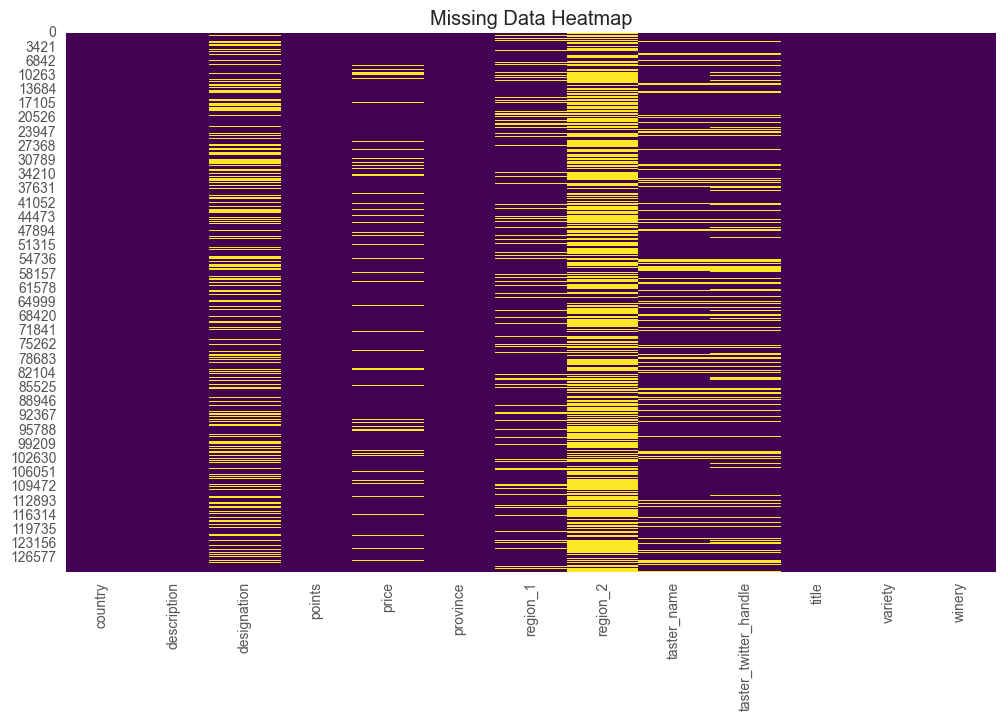

In [15]:
# Visualize the missing data using a heatmap
plt.figure(figsize=(12, 7))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()

This heatmap gives us a fast visual summary of our missing data problem. The large yellow block for `region_2` immediately confirms that this column is mostly empty and not very useful. We can also see significant, scattered gaps in the taster information and `designation`, which supports the idea of either removing them or using them with caution. Most importantly, the dark purple columns for `description`, `title`, and `points` show that our key features are solid. This visual evidence reinforces our plan to focus our cleaning efforts on specific columns rather than just deleting every row with a missing value.

## 5. Distribution analysis (univariate)

Goal: Understand the distribution of individual features.

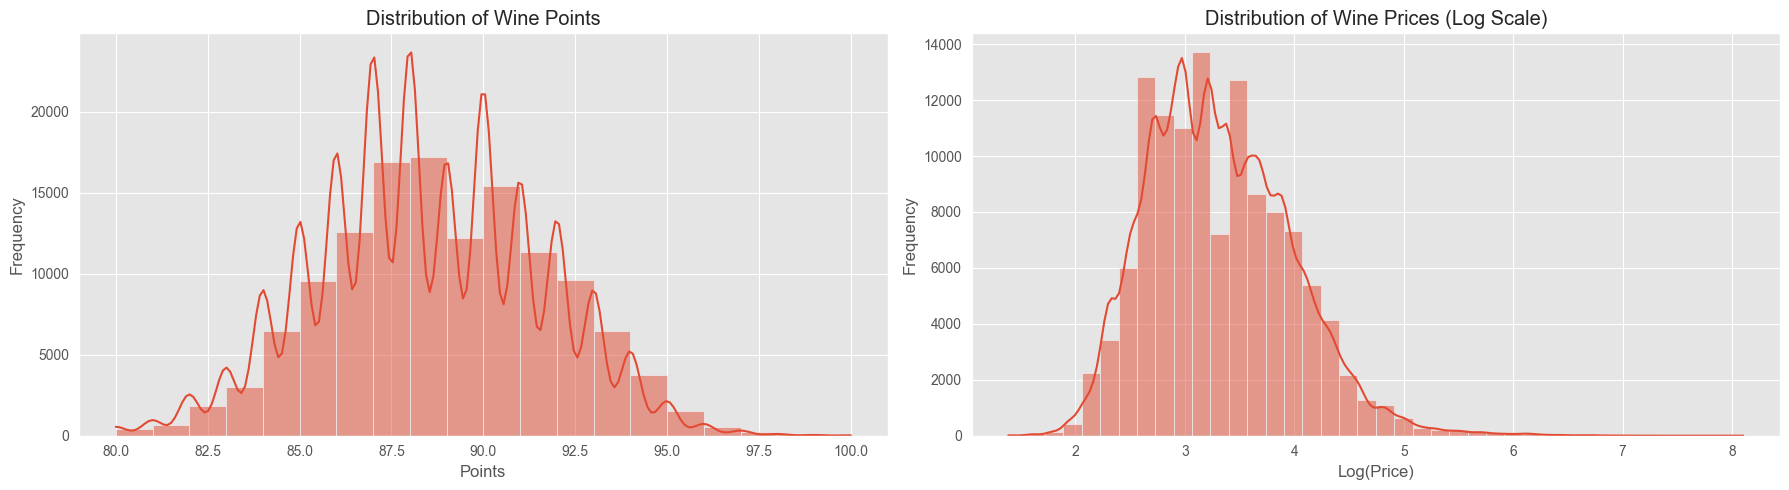

In [18]:
# Set up the figure for plotting
plt.figure(figsize=(18, 5))

# Plot distribution of 'points'
plt.subplot(1, 2, 1)
sns.histplot(df['points'], bins=20, kde=True)
plt.title('Distribution of Wine Points')
plt.xlabel('Points')
plt.ylabel('Frequency')

# Plot distribution of 'price'
# We'll plot the log of the price to handle the long tail/skewness
plt.subplot(1, 2, 2)
sns.histplot(np.log(df['price'].dropna()), bins=40, kde=True)
plt.title('Distribution of Wine Prices (Log Scale)')
plt.xlabel('Log(Price)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

These charts reveal key characteristics of the wine market within the dataset. The points distribution is centered around 87-88, showing that most reviewed wines are considered "very good," with fewer wines at the exceptional (95+) or merely acceptable ends of the scale. The price distribution is heavily skewed towards lower-cost wines, and using a log scale was necessary to see its shape clearly, confirming that very expensive wines are rare outliers. This tells us the recommendation system will primarily be working with good-quality, affordable to mid-range wines, which is a realistic scenario for most consumers.

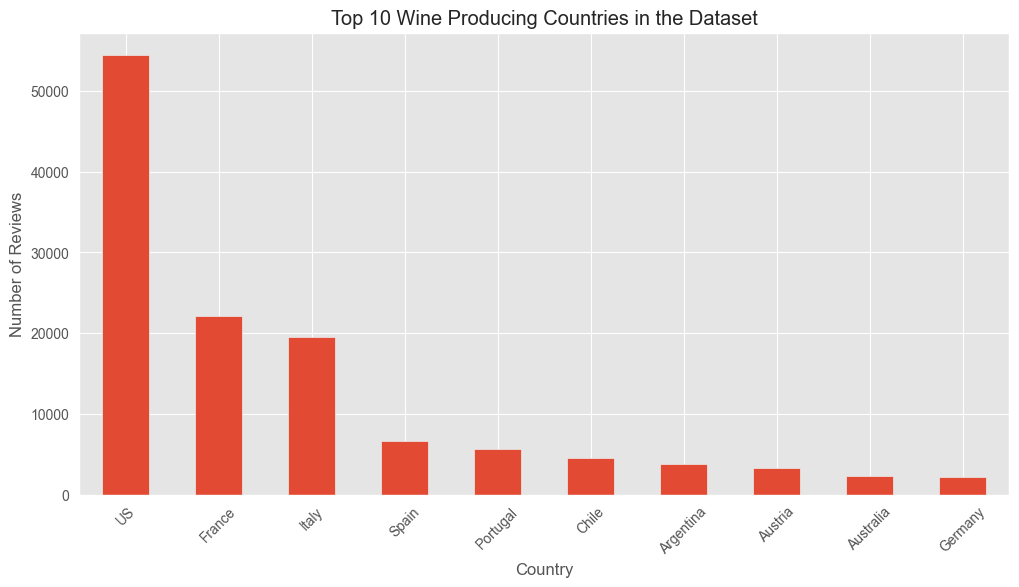

In [19]:
# Plot top 10 countries
plt.figure(figsize=(12, 6))
df['country'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Wine Producing Countries in the Dataset')
plt.xlabel('Country')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.show()

This chart clearly shows the dataset is dominated by wines from the United States, which has more than twice the number of reviews as the next country, France. This heavy representation means our model will be very knowledgeable about US wines. While classic European countries like France and Italy are also well-represented, there is a significant drop-off in data for other regions. This imbalance is a key finding, as it suggests a potential bias in our system's expertise towards American wines.

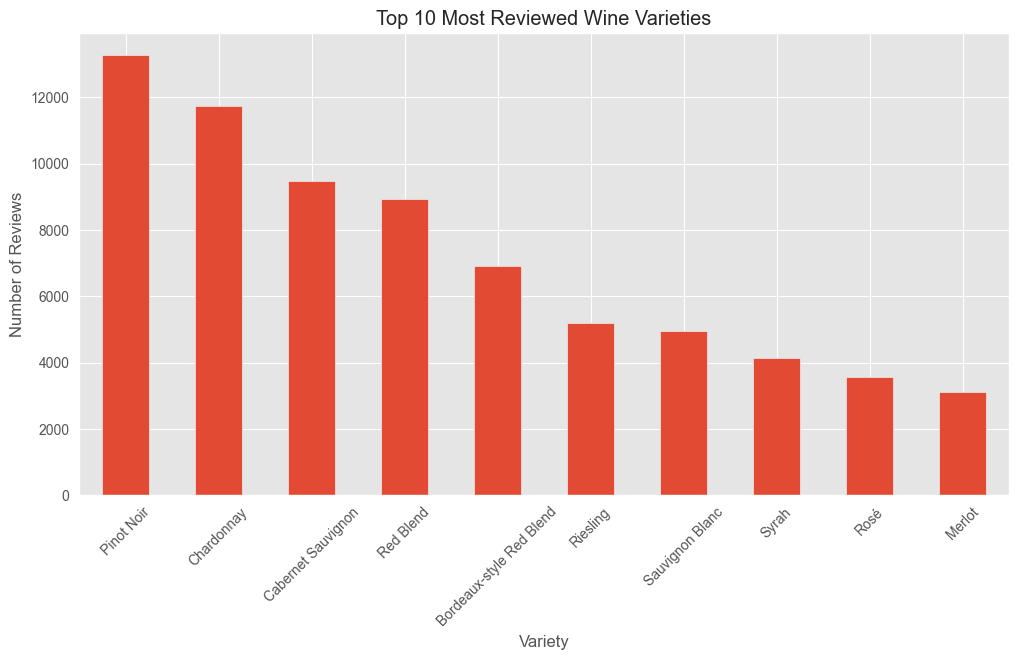

In [20]:
# Plot top 10 varieties
plt.figure(figsize=(12, 6))
df['variety'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Most Reviewed Wine Varieties')
plt.xlabel('Variety')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.show()

This chart reveals that the dataset is heavily focused on a few globally popular grape varieties. Pinot Noir and Chardonnay are the clear leaders, which means the model will have a rich vocabulary for describing them. The presence of both red and white varieties in the top ten, as well as blends, ensures a good diversity for the recommendation system to learn from. However, this also highlights a potential blind spot for less common or niche grape varieties, where the model will have significantly less data to draw upon for making nuanced recommendations.

## 6. Relationship analysis (bivariate)

Goal: Investigate relationships between pairs of features.

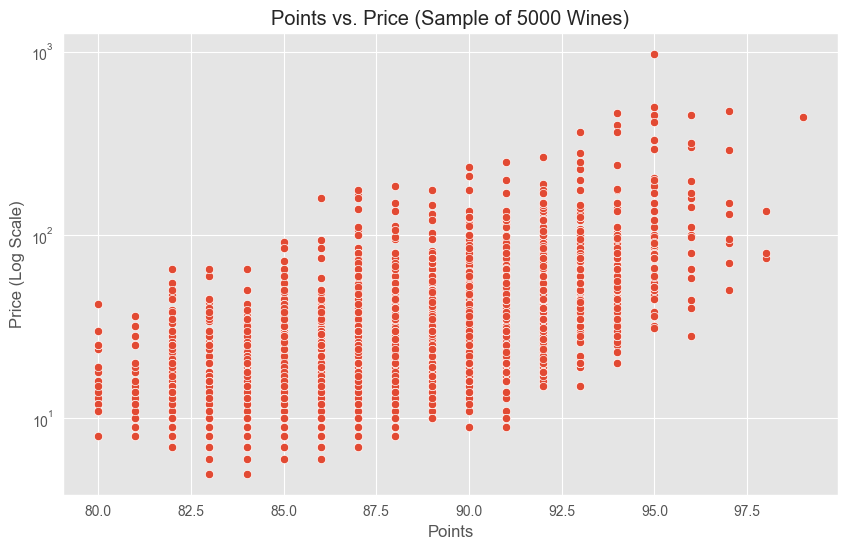

In [21]:
# Relationship between points and price
plt.figure(figsize=(10, 6))
# We'll plot a subset of the data to avoid overplotting
sns.scatterplot(data=df.sample(n=5000, random_state=42), x='points', y='price')
plt.title('Points vs. Price (Sample of 5000 Wines)')
plt.yscale('log') # Use a log scale for price due to skewness
plt.ylabel('Price (Log Scale)')
plt.xlabel('Points')
plt.show()

This scatter plot clearly shows a positive correlation between a wine's points and its price. As the point score increases, the price of the wine also tends to rise, confirming the general rule that higher-quality wines are more expensive. However, the plot also reveals a wide range of prices within each point category. For example, at the 90-point mark, there are wines priced from under $20 to over $200. This is a crucial insight for the project, as it highlights the opportunity to find "value" wines—those with high scores but relatively low prices—which will be a key feature of a successful recommendation system.

/var/folders/kv/g0g8nw2j0jbbsk8g5j6dxdbr0000gp/T/ipykernel_77796/3470632545.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df[df['country'].isin(top_countries)], x='country', y='points', palette='viridis')


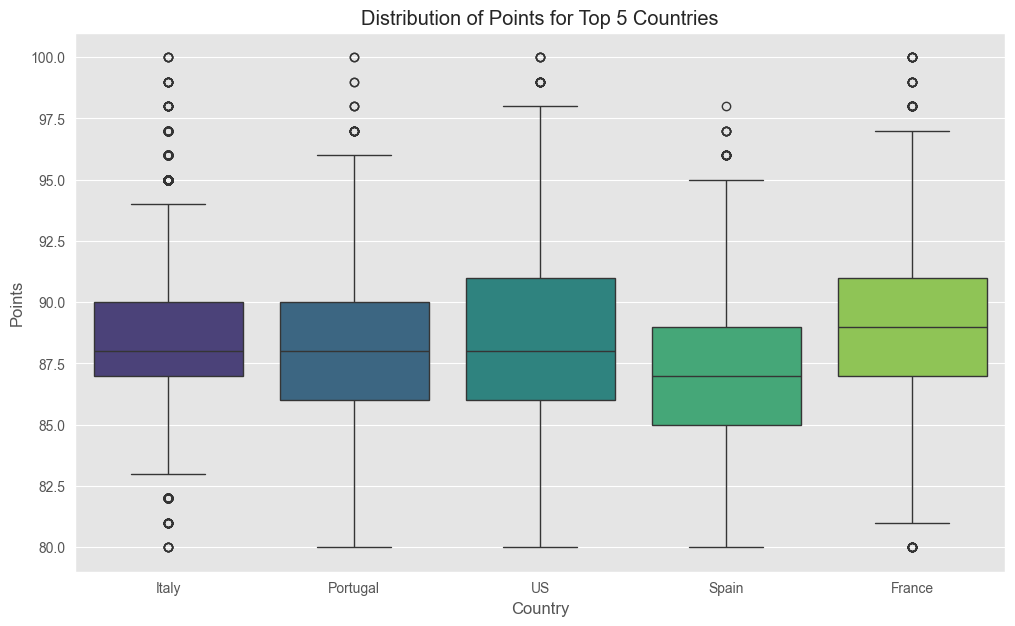

In [22]:
# Points distribution by top 5 countries
top_countries = df['country'].value_counts().head(5).index
plt.figure(figsize=(12, 7))
sns.boxplot(data=df[df['country'].isin(top_countries)], x='country', y='points', palette='viridis')
plt.title('Distribution of Points for Top 5 Countries')
plt.xlabel('Country')
plt.ylabel('Points')
plt.show()

This box plot reveals that while the median scores for the top five countries are quite similar, clustered around the 87-88 point mark, there are notable differences in their score distributions. The US and France, for instance, show a wider range of scores, with many high-scoring outliers, indicating they produce a significant number of exceptional, top-tier wines. In contrast, Spain's distribution is more compressed and slightly lower, suggesting a consistency in producing good, but perhaps less frequently outstanding, wines according to this dataset. This insight is valuable as it shows that a wine's country of origin can be a subtle indicator of its potential quality range.

/var/folders/kv/g0g8nw2j0jbbsk8g5j6dxdbr0000gp/T/ipykernel_77796/422552268.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df[df['variety'].isin(top_varieties)], x='variety', y='points', palette='plasma')


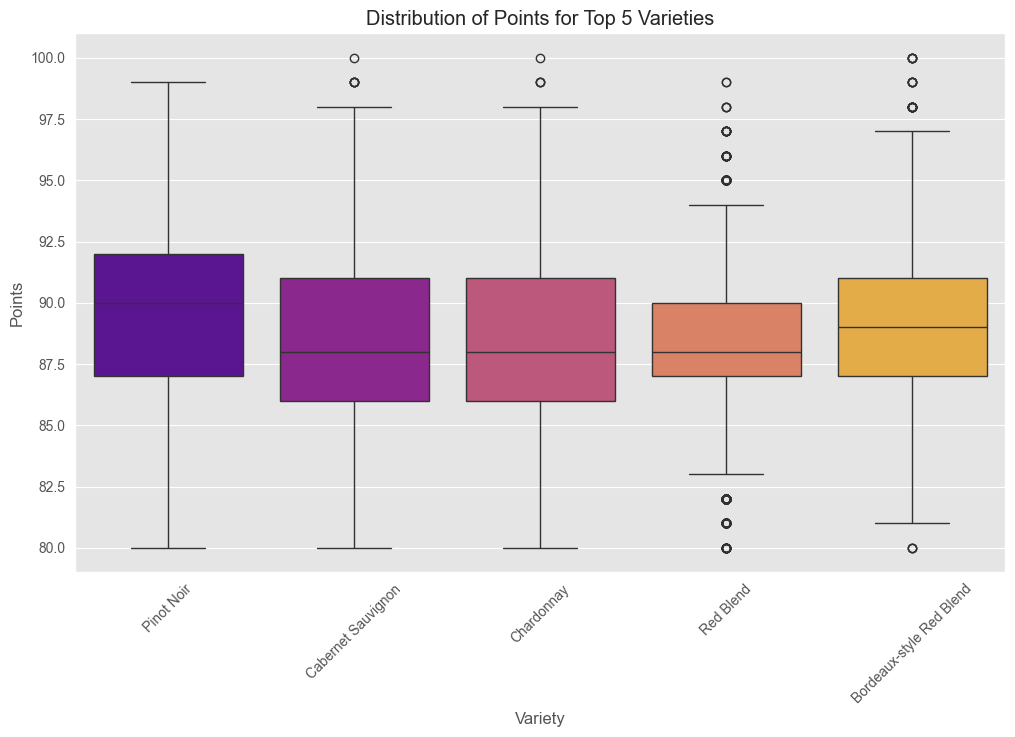

In [23]:
# Points distribution by top 5 varieties
top_varieties = df['variety'].value_counts().head(5).index
plt.figure(figsize=(12, 7))
sns.boxplot(data=df[df['variety'].isin(top_varieties)], x='variety', y='points', palette='plasma')
plt.title('Distribution of Points for Top 5 Varieties')
plt.xlabel('Variety')
plt.ylabel('Points')
plt.xticks(rotation=45)
plt.show()

This visualization shows that among the most popular wines, Pinot Noir and Cabernet Sauvignon tend to receive slightly higher and more consistent quality scores, as indicated by their higher median points and tighter distributions. In contrast, Red Blends and Bordeaux-style Blends exhibit a much wider range of scores, meaning a wine of that variety could be of average quality or truly exceptional. This is a key insight for the recommendation system, as it suggests that knowing a wine's variety provides a strong clue about its likely quality tier, which can help in making more reliable recommendations.

/var/folders/kv/g0g8nw2j0jbbsk8g5j6dxdbr0000gp/T/ipykernel_77796/2248704009.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df[df['variety'].isin(top_varieties)], x='variety', y='price', palette='magma')


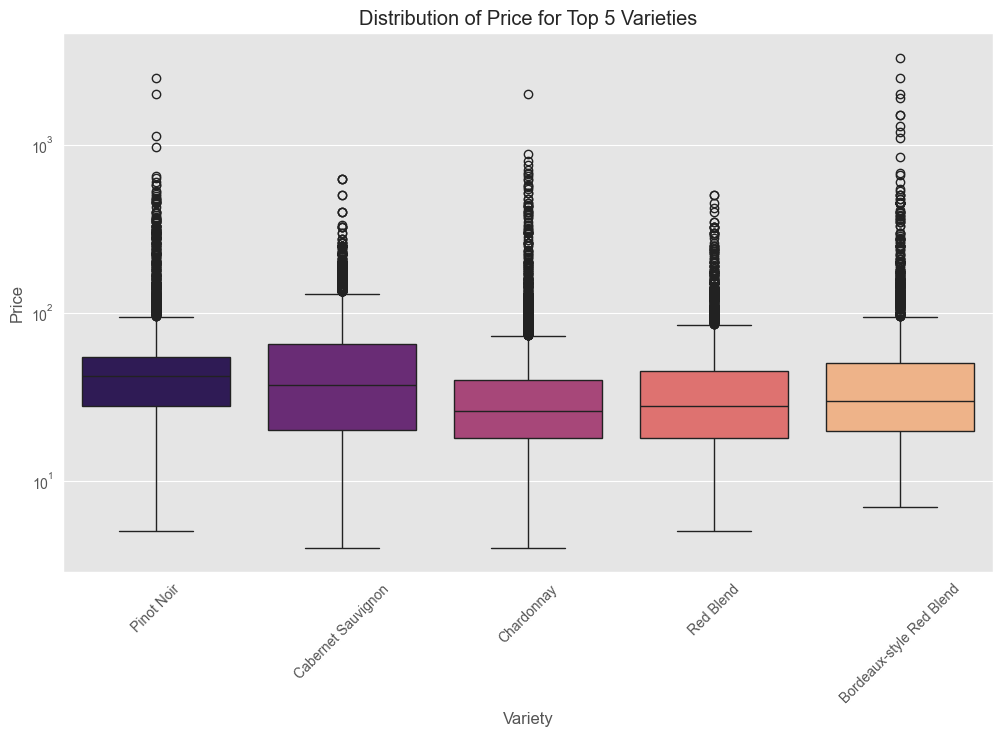

In [27]:
# Price distribution by top 5 varieties
plt.figure(figsize=(12, 7))
sns.boxplot(data=df[df['variety'].isin(top_varieties)], x='variety', y='price', palette='magma')
plt.title('Distribution of Price for Top 5 Varieties')
plt.xlabel('Variety')
plt.ylabel('Price')
plt.yscale('log') # Use a log scale for price due to skewness
plt.xticks(rotation=45)
plt.show()

This box plot reveals significant price variations among the most popular wine varieties, even when viewed on a log scale. Pinot Noir and Cabernet Sauvignon not only command higher median prices but also exhibit a vast range, with numerous high-priced outliers indicating a premium market for these grapes. In contrast, Red Blends and Chardonnay offer a more consistent and generally lower price point. This insight is crucial for developing the "Value Score" feature, as it confirms that a wine's variety is a strong determinant of its expected price range.

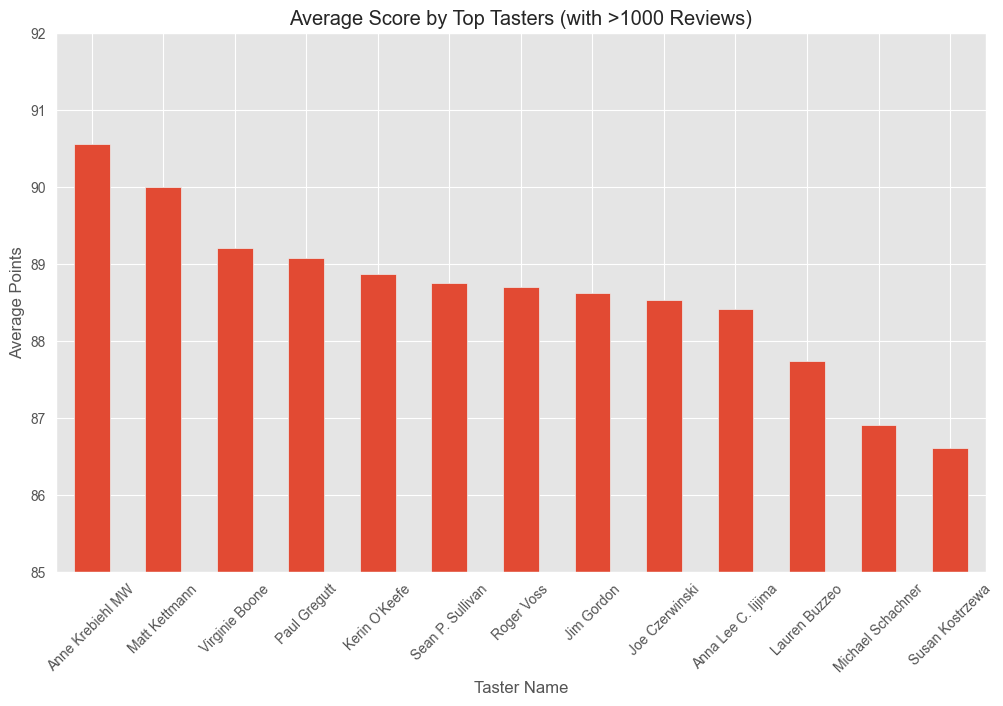

In [28]:
# Taster bias analysis
# Let's see if some tasters give higher scores on average.

# First, get the count of reviews per taster
taster_counts = df['taster_name'].value_counts()

# Filter for tasters with a significant number of reviews (e.g., > 1000)
top_tasters = taster_counts[taster_counts > 1000].index

# Calculate the mean points for these top tasters
mean_points_by_taster = df[df['taster_name'].isin(top_tasters)].groupby('taster_name')['points'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 7))
mean_points_by_taster.plot(kind='bar')
plt.title('Average Score by Top Tasters (with >1000 Reviews)')
plt.xlabel('Taster Name')
plt.ylabel('Average Points')
plt.xticks(rotation=45)
plt.ylim(85, 92) # Set y-axis limits to better visualize differences
plt.show()

This chart shows that a taster's identity can influence wine scores. While the average scores for most prolific tasters are clustered between 87 and 90, there's a discernible hierarchy, with some critics like Anne Krebiehl MW consistently rating wines higher than others like Susan Kostrzewa. This suggests a degree of subjectivity and potential bias in the scoring process. While we won't use taster names directly in the model to avoid overfitting, this insight is valuable context, reminding us that the "points" feature is not a purely objective measure of quality.

## 7. Text data exploration

Goal: Analyze the 'description' column to understand the language of wine reviews.

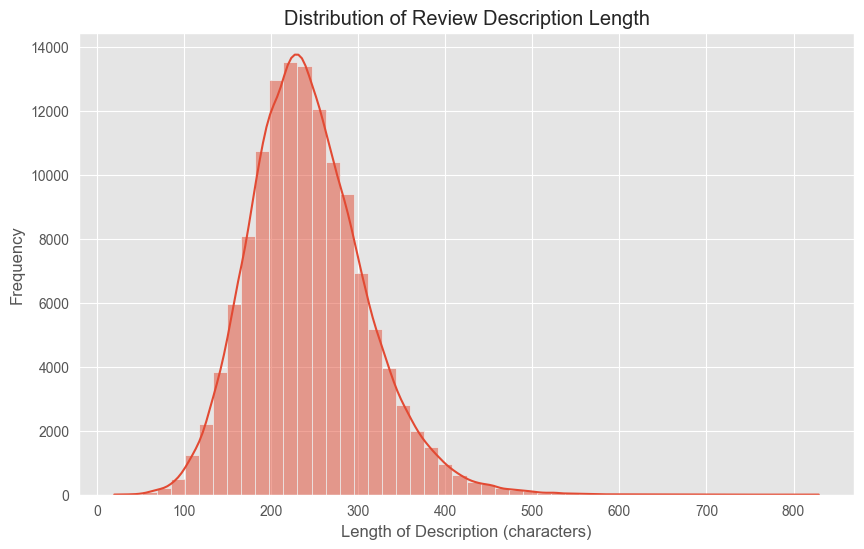

In [24]:
# Description length
df['description_length'] = df['description'].str.len()
plt.figure(figsize=(10, 6))
sns.histplot(df['description_length'], bins=50, kde=True)
plt.title('Distribution of Review Description Length')
plt.xlabel('Length of Description (characters)')
plt.ylabel('Frequency')
plt.show()

This histogram shows that most wine reviews are between 200 and 300 characters long, following a clear normal distribution. Very short or very long reviews are uncommon. This consistency is beneficial for the NLP models, as it means we don't have to worry about extreme variations in text length throwing off our analysis. The predictable length suggests that tasters generally follow a similar format and level of detail when writing their reviews.

In [45]:
from sklearn.feature_extraction.text import CountVectorizer

In [46]:
# Word and n-gram frequency analysis
def plot_top_ngrams(corpus, title, ngram_range=(1,1), top_n=20):
    """Helper function to plot the top N n-grams."""
    vec = CountVectorizer(ngram_range=ngram_range, stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    
    top_df = pd.DataFrame(words_freq[:top_n], columns=['Ngram', 'Freq'])
    
    plt.figure(figsize=(12, 8))
    sns.barplot(x='Freq', y='Ngram', data=top_df)
    plt.title(title)
    plt.show()

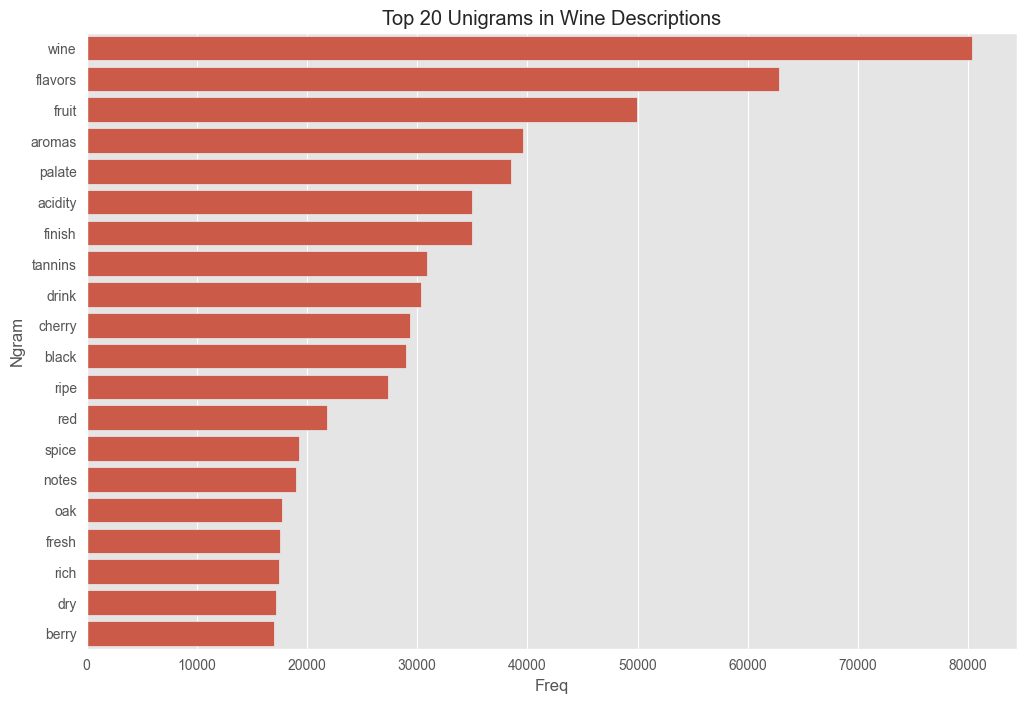

In [47]:
# Plot top unigrams (single words)
plot_top_ngrams(df['description'].dropna(), 'Top 20 Unigrams in Wine Descriptions', ngram_range=(1,1))

This bar chart reveals the core vocabulary used by wine tasters. Structural components of wine like "flavors," "palate," "acidity," and "finish" are among the most frequent terms, confirming that reviews follow a consistent analytical format. The frequent appearance of general descriptive words like "fruit," "cherry," and "spice" highlights the key categories of aromas and tastes that are most common or easily identifiable in wines. This provides a foundational dictionary of terms that our NLP model must be able to understand and weigh appropriately.

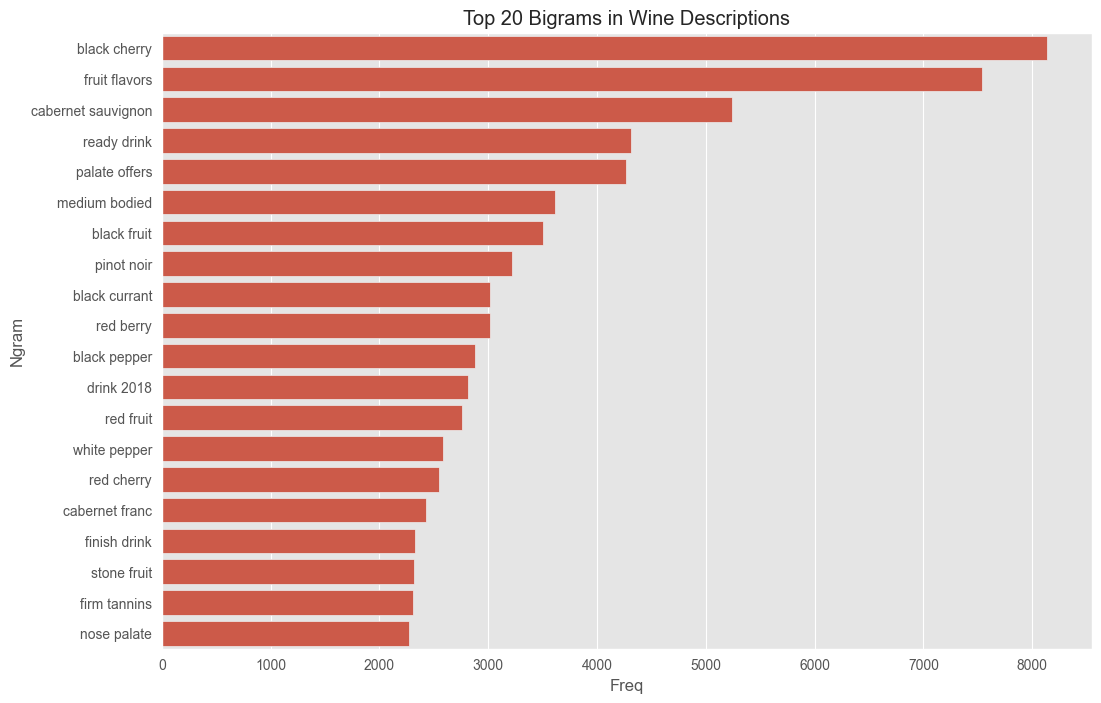

In [48]:
# Plot top bigrams (2-word phrases)
plot_top_ngrams(df['description'].dropna(), 'Top 20 Bigrams in Wine Descriptions', ngram_range=(2,2))

This bigram analysis gives us a much clearer picture of specific flavor profiles. Phrases like "black cherry," "black fruit," and "red berry" dominate, showing that fruit characteristics are often described with a color and a type. We also see structural phrases like "firm tannins" and "medium bodied" appearing frequently. This confirms that the model needs to recognize these multi-word phrases as single, important concepts rather than just individual words, which reinforces the value of analyzing n-grams for the recommendation engine.

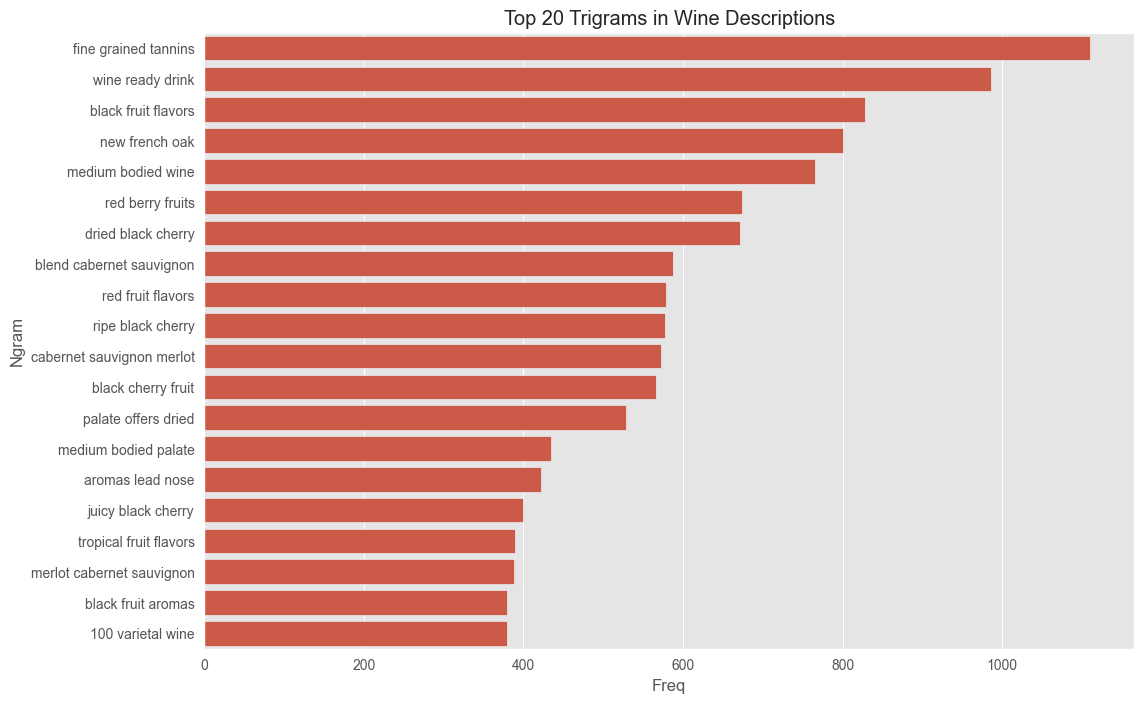

In [49]:
# Plot top trigrams (3-word phrases)
plot_top_ngrams(df['description'].dropna(), 'Top 20 Trigrams in Wine Descriptions', ngram_range=(3,3))

This trigram analysis reveals even more specific and sophisticated descriptive language. Phrases like "fine grained tannins" and "new french oak" point to the technical aspects of winemaking that critics notice. We also see more detailed flavor notes like "dried black cherry" and "juicy black cherry," showing a high level of nuance in the descriptions. The recurrence of these complex, multi-word phrases highlights the importance of using a model that can understand the meaning of entire sentences, as a simple keyword-based approach would miss these subtleties.

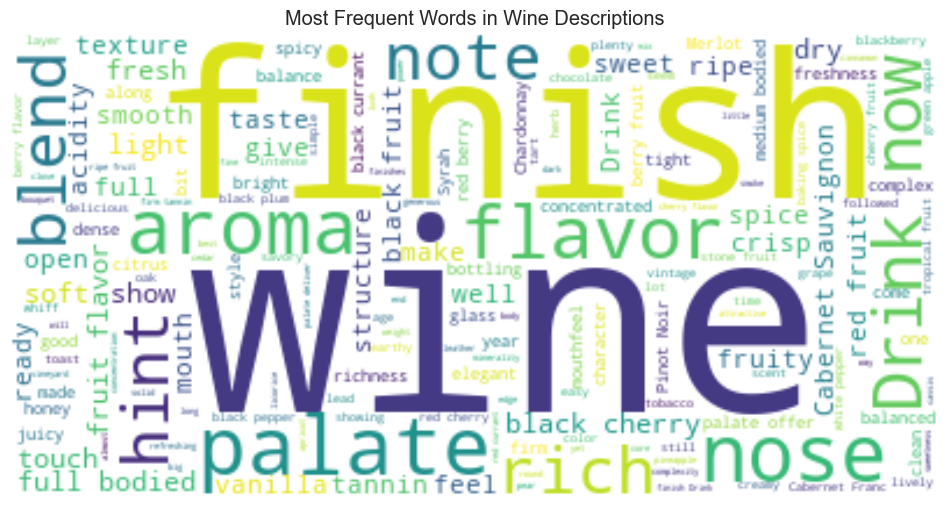

In [25]:
# Word Cloud

# Combine all descriptions into a single string of text
text = " ".join(review for review in df.description)
wordcloud = WordCloud(max_words=200, background_color="white").generate(text)

# Display the generated image:
plt.figure(figsize=(12, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most Frequent Words in Wine Descriptions')
plt.show()

This word cloud provides a powerful visual summary of the language used in wine reviews, instantly confirming our findings from the frequency charts. The dominance of words like "wine," "flavor," "palate," and "finish" reinforces that reviews are structured around a core set of tasting elements. We can also see a rich vocabulary of descriptive terms like "cherry," "vanilla," "spice," and "tannin" clustered around these core concepts. This visualization effectively captures the essence of the dataset, showing a blend of technical tasting notes and evocative flavor descriptors, which is exactly the kind of language our NLP model will need to learn to understand.

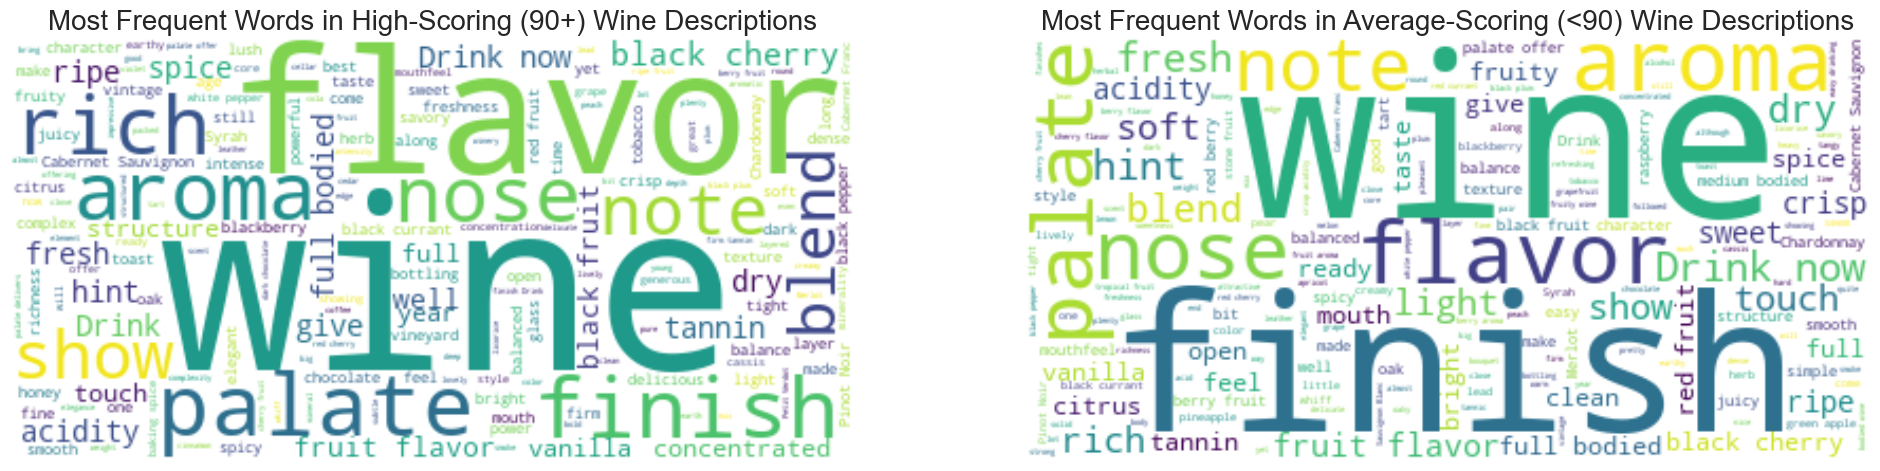

In [26]:
# Comparative Word Clouds by Wine Score
# Let's define "high-scoring" as 90+ points and "average-scoring" as below 90

# High-scoring wines
high_scoring_text = " ".join(review for review in df[df.points >= 90].description)
wordcloud_high = WordCloud(max_words=200, background_color="white").generate(high_scoring_text)

# Average-scoring wines
average_scoring_text = " ".join(review for review in df[df.points < 90].description)
wordcloud_avg = WordCloud(max_words=200, background_color="white").generate(average_scoring_text)

# Display the generated images
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 10))

ax1.imshow(wordcloud_high, interpolation='bilinear')
ax1.axis("off")
ax1.set_title('Most Frequent Words in High-Scoring (90+) Wine Descriptions', fontsize=20)

ax2.imshow(wordcloud_avg, interpolation='bilinear')
ax2.axis("off")
ax2.set_title('Most Frequent Words in Average-Scoring (<90) Wine Descriptions', fontsize=20)

plt.show()

This side-by-side comparison is very revealing, as it clearly shows a shift in vocabulary with wine quality. The word cloud for high-scoring wines features more specific and sophisticated terms like "black cherry," "tannin," "ripe," and "concentrated," suggesting complexity and structure. In contrast, the cloud for average-scoring wines relies on more general and simpler descriptors like "fruity," "fresh," "soft," and "hint." This is a critical insight, confirming that the language used in reviews contains strong signals about a wine's quality, which our NLP models can learn to leverage for making more accurate recommendations.

In [51]:
import textstat

In [52]:
# Wording complexity analysis
# Calculate readability score for each description
df['readability_score'] = df['description'].apply(textstat.flesch_reading_ease)

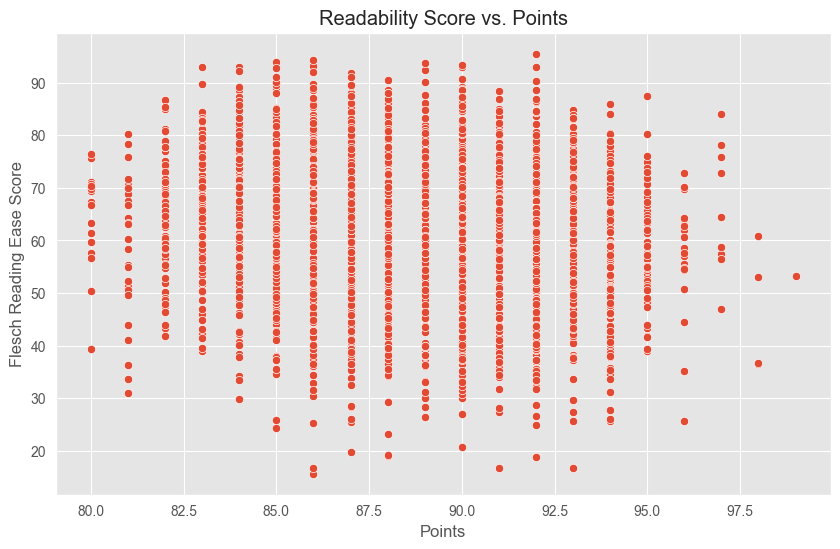

In [53]:
# Plot readability vs. points
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df.sample(n=5000, random_state=42), x='points', y='readability_score')
plt.title('Readability Score vs. Points')
plt.xlabel('Points')
plt.ylabel('Flesch Reading Ease Score')
plt.show()

This scatter plot shows there is no meaningful correlation between the readability score of a review and the wine's point rating. A high-scoring wine is just as likely to have a simple, easy-to-read description as it is to have a complex one. This is an important finding because it tells us that the complexity of the language isn't a signal of quality; instead, the specific *words* being used are what matter. This reinforces our strategy of focusing on the semantic content of the reviews rather than trying to engineer features based on sentence structure or readability.

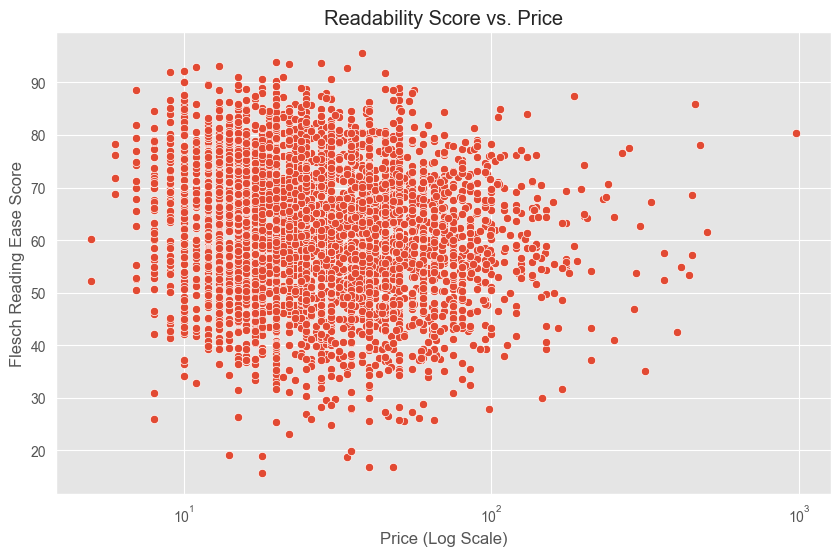

In [54]:
# Plot readability vs. price
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df.sample(n=5000, random_state=42), x='price', y='readability_score')
plt.title('Readability Score vs. Price')
plt.xlabel('Price (Log Scale)')
plt.ylabel('Flesch Reading Ease Score')
plt.xscale('log')
plt.show()

Much like the previous chart, this scatter plot shows no correlation between the readability of a review and the wine's price. The points form a random cloud, indicating that an expensive, premium wine is just as likely to have a simple, easy-to-read description as an inexpensive one. This is a valuable negative result, as it confirms that linguistic complexity is not a proxy for price or quality. This reinforces the decision to focus the modeling efforts on the semantic content and specific keywords within the reviews rather than on structural features like sentence complexity.

## 8. Advanced semantic analysis and visualization

Goal: Explore the contextual meaning of words using word embeddings.

In [34]:
import nltk
from gensim.models import Word2Vec

In [31]:
# First, we need to tokenize the descriptions (split them into lists of words)
# We'll use a simple tokenizer from NLTK for this.
tokenized_descriptions = [nltk.word_tokenize(desc.lower()) for desc in df['description']]

In [35]:
# Train a Word2Vec model on the descriptions
# This creates a vector for each word based on its context.

w2v_model = Word2Vec(
    sentences=tokenized_descriptions,
    vector_size=100, # Each word will be a 100-dimensional vector
    window=5, # Considers 5 words before and 5 words after the target word
    min_count=5, # Ignores words that appear less than 5 times
    workers=4 # Uses 4 cores to speed up training
    )

In [36]:
# Now, let's explore the model by finding similar words
print("Words similar to 'fruity':", w2v_model.wv.most_similar('fruity', topn=5))
print("Words similar to 'oaky':", w2v_model.wv.most_similar('oaky', topn=5))
print("Words similar to 'tannins':", w2v_model.wv.most_similar('tannins', topn=5))
print("Words similar to 'acidic':", w2v_model.wv.most_similar('acidic', topn=5))

Words similar to 'fruity': [('perfumed', 0.5825430154800415), ('fruitiness', 0.5765736103057861), ('rounded', 0.5709718465805054), ('flavored', 0.5692976117134094), ('fruited', 0.5653298497200012)]
Words similar to 'oaky': [('woody', 0.7793536186218262), ('blackened', 0.6677879095077515), ('oak-based', 0.6378281116485596), ('oak', 0.6296457052230835), ('chocolaty', 0.6161009669303894)]
Words similar to 'tannins': [('tannin', 0.7053929567337036), ('tannic', 0.6344828009605408), ('structure', 0.4990597367286682), ('texture', 0.39462438225746155), ('support', 0.36869117617607117)]
Words similar to 'acidic': [('edgy', 0.6510856747627258), ('angular', 0.6497821807861328), ('narrow', 0.6253665685653687), ('citric', 0.6129298806190491), ('high-acid', 0.5818125009536743)]


This output is a strong confirmation that the custom `Word2Vec` model has successfully learned the language of wine. It correctly identifies synonyms like "woody" for "oaky" and grammatical variations like "tannin" for "tannins." More impressively, it has captured abstract relationships, such as linking "tannins" to "structure" and "texture," and associating "acidic" with sophisticated tasting notes like "edgy" and "angular." This demonstrates that the model understands the contextual meaning of these specialized terms, which is a crucial capability for building a nuanced and accurate recommendation engine.

## 9. Interactive word vector visualization

In [61]:
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

In [67]:
# Get the vocabulary and vectors from the trained model
vocab = list(w2v_model.wv.index_to_key)
vectors = w2v_model.wv[vocab]

In [68]:
# Use a subset of the vocab for performance reasons
num_words_to_plot = 500
subset_vectors = vectors[:num_words_to_plot]
subset_vocab = vocab[:num_words_to_plot]

In [69]:
# Use K-Means to find clusters in the original high-dimensional space
# We'll look for 8 clusters as an example
kmeans = KMeans(n_clusters=8, random_state=42, n_init='auto')
cluster_labels = kmeans.fit_predict(subset_vectors)

### 9.1. 2D visualization

In [70]:
# Reduce the 100-dimensional vectors to 2 dimensions using t-SNE
tsne_2d = TSNE(n_components=2, random_state=42, perplexity=15)
vectors_2d = tsne_2d.fit_transform(subset_vectors)

In [71]:
# Create a DataFrame for plotting
tsne_df_2d = pd.DataFrame(vectors_2d, columns=['x', 'y'])
tsne_df_2d['word'] = subset_vocab
tsne_df_2d['cluster'] = cluster_labels

In [72]:
# Create an interactive 2D scatter plot with Plotly, colored by cluster
fig_2d = px.scatter(tsne_df_2d, x='x', y='y', text='word', color='cluster',
                    title='2D t-SNE Visualization of Word Clusters')
fig_2d.update_traces(textposition='top center')
fig_2d.update_layout(height=800, title_text='Interactive 2D t-SNE Visualization of Word Embeddings with Clusters')
fig_2d.show()

This interactive plot provides a map of the language of wine. We can clearly see that the `Word2Vec` model has learned to group words by their contextual meaning, creating distinct clusters of related terms. For example, in the top left, there's a tight cluster of dark fruits like "blackberry" and "plum" alongside spicy notes like "pepper" and "baking spice." Similarly, structural terms like "tannins," "texture," and "acidity" are grouped together, separate from the fruit and spice profiles. This visualization is the strongest evidence yet that the custom embeddings have successfully captured the semantic relationships within the wine descriptions, which is a fantastic result for the recommendation model.

### 9.3. 3D visualization

In [73]:
# Reduce the 100-dimensional vectors to 3 dimensions using t-SNE
tsne_3d = TSNE(n_components=3, random_state=42, perplexity=15)
vectors_3d = tsne_3d.fit_transform(subset_vectors)

In [74]:
# Create a DataFrame for plotting
tsne_df_3d = pd.DataFrame(vectors_3d, columns=['x', 'y', 'z'])
tsne_df_3d['word'] = subset_vocab
tsne_df_3d['cluster'] = cluster_labels

In [75]:
# Create an interactive 3D scatter plot with Plotly, colored by cluster
fig_3d = px.scatter_3d(tsne_df_3d, x='x', y='y', z='z', text='word', color='cluster',
                       title='3D t-SNE Visualization of Word Clusters')
fig_3d.update_traces(marker_size=2, textposition='top center')
fig_3d.update_layout(height=800, title_text='Interactive 3D t-SNE Visualization of Word Embeddings with Clusters')
fig_3d.show()

This 3D visualization provides a more immersive and detailed view of the word relationships the model has learned. The added dimension helps to further separate the clusters, making the semantic groupings even clearer than in the 2D plot. We can now rotate the space to see how clusters of fruit descriptors (like "cherry," "berry," and "plum") are distinct from structural terms (like "tannins," "balance," and "acidity), and how winemaking terms (like "oak," "barrel," and "aged") form their own unique neighborhood. This confirms that our custom embeddings have built a robust, multi-dimensional understanding of wine terminology, which is an excellent foundation for the recommendation engine.

## Conclusion and key insights

This initial exploration has provided several crucial insights that will guide the next phase of the project. We've confirmed that the most important features for NLP (`description`, `title`, `variety`) are largely complete, while other columns will require a careful cleaning strategy. The analysis revealed a clear positive correlation between price and points, but also a wide variance, highlighting an opportunity to identify "value" wines.

Most importantly, the text analysis showed that the language used by critics contains strong signals; high-scoring wines are described with more complex and specific terms than average ones. The custom `Word2Vec` model successfully captured these semantic relationships, creating meaningful clusters of wine terminology. These findings validate our content-based approach and give us confidence that the text descriptions contain enough rich information to build a powerful recommendation engine. The next step is to use these insights to preprocess the data and begin experimenting with different modeling techniques.